In [3]:
# from tensorflow import keras

In [3]:
from keras.layers import Input, Dense
from keras.models import Sequential

In [ ]:
# Sequential : 모델을 불러오는 클래스(== 모델)
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
# Sequential도 위에 머신러닝의 의사결정나무처럼 동일하게 모델을 불러와주는 행위다.

model = Sequential()
# 머신러닝 알고리즘과 다른 점은 뭐냐?
# Sequential로 만든애는 기본적인 구조만 가지고 있는 상태
# 입력층과 은닉층과 출력층이 하나도 없는 상태
# 저희가 입력층, 은닉층, 출력층을 만들어서 추가시켜줘야지만 모델이 완성된다.

In [ ]:
# Input : 입력층을 만들때 쓰는 함수
# Dense : 계층(입력층, 은닉층, 출력층)을 만들때 쓰는 함수

model.add(  Input(shape = 13)  ) # shape은 입력 데이터의 개수 또는 모양
model.add(  Dense(units = 20, activation = 'relu') )  # Input과 마지막 Dense 사이에 있으므로 은닉층이라고 한다.
model.add(  Dense(units = 10, activation = 'sigmoid') ) # units은 노드의 개수, activation는 활성화 함수를 지정
# 가장 마지막 Dense는 출력층이 된다.

In [4]:
# 딥러닝 모델생성 관련
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Sequential
# 필요 라이브러리
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
boston = pd.read_csv('data/boston_house_prices.csv')

In [6]:
X = boston.iloc[:, :-1]
Y = boston.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [7]:
# 딥러닝 모델의 구조설정
model = Sequential() # 모델 생성
model.add(Input(shape = 13)) # 입력층 추가
model.add(Dense(1, activation='relu')) # 출력층 추가

In [20]:
model.compile(loss = 'mean_squared_error', # 손실함수 : 회귀에서는 평균제곱오차 MSE
              optimizer = 'sgd',           # optimizer : 경사하강법 종류
              metrics=['mse', 'r2'])             # 학습데이터를 통해서 학습하고 나서 평가를 통해서 학습데이터를 평가한다.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [21]:
# epochs : 학습의 횟수를 결정
# train데이터가 (404)개가 다 들어가서 학습을 완료하면 1회 끝나다고 말한다
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


ValueError: ignored

In [12]:
import numpy as np
np.sqrt(7335.0581)

85.64495373342203

In [13]:
pred = model.predict(X_test)
pred.shape

4/4 [==============================] - 0s 3ms/step


(102, 1)

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred.reshape(-1))

575.1394117647059

In [19]:
model.evaluate(X_test, y_test)
# 앞쪽은 loss의 값, 뒤쪽은 metric의 값

4/4 [==============================] - 0s 8ms/step - loss: 575.1394 - mse: 575.1394


[575.139404296875, 575.139404296875]

In [29]:
# 딥러닝 모델의 구조설정
model = Sequential() # 모델 생성
model.add(Input(shape = 13)) # 입력층
model.add(Dense(1, activation = 'relu')) # 출력층
# 딥러닝 학습설정
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics=['mse'])


In [30]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
13/13 [==============================] - 1s 5ms/step - loss: 99487.6328 - mse: 99487.6328
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 92086.1562 - mse: 92086.1562
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 85145.1484 - mse: 85145.1484
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 78453.4375 - mse: 78453.4375
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 72298.0625 - mse: 72298.0625
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 66450.0625 - mse: 66450.0625
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 60980.5430 - mse: 60980.5430
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 55832.6992 - mse: 55832.6992
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 51103.4570 - mse: 51103.4570
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 46645.4258 - mse: 

In [28]:
model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


array([[ 0.       ],
       [ 4.1474705],
       [13.62068  ],
       [ 3.2146053],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [29.738337 ],
       [44.568226 ],
       [35.168354 ],
       [ 7.7998486],
       [ 6.6354275],
       [ 7.1323795],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [10.679758 ],
       [ 3.6535816],
       [ 0.       ],
       [ 0.       ],
       [23.45239  ],
       [10.737295 ],
       [19.025087 ],
       [ 2.9750614],
       [ 6.0780163],
       [ 3.3278828],
       [ 0.       ],
       [ 6.682081 ],
       [ 0.       ],
       [ 7.2031116],
       [ 0.       ],
       [ 7.3980427],
       [ 0.       ],
       [21.678751 ],
       [10.824263 ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 4.0827656],
       [ 0.       ],
       [ 6.9304295],
       [ 0.       ],
       [13.09

In [35]:
# 딥러닝 모델의 구조설정
model = Sequential() # 모델 생성
model.add(Input(shape = 13)) # 입력층
model.add(Dense(16, activation = 'relu')) # 은닉층1
model.add(Dense(32, activation = 'relu')) # 은닉층2
model.add(Dense(1, activation = 'relu')) # 출력층
# 딥러닝 학습설정
model.compile(loss = 'mean_squared_error',
optimizer = 'rmsprop',
metrics=['mse'])
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
13/13 [==============================] - 1s 4ms/step - loss: 123.2066 - mse: 123.2066
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 85.6586 - mse: 85.6586
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 72.1586 - mse: 72.1586
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 82.7076 - mse: 82.7076
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 66.3399 - mse: 66.3399
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 77.6476 - mse: 77.6476
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 71.7850 - mse: 71.7850
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 70.1786 - mse: 70.1786
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 62.6045 - mse: 62.6045
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 74.9860 - mse: 74.9860
Epoch 11/50
13/13 [============================

In [36]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 59.4198 - mse: 59.4198


[59.419830322265625, 59.419830322265625]

In [34]:
np.sqrt(85)

9.219544457292887

In [37]:
model.summary()
# Tatal params : 총 가중치의 개수

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 1 byte
# 1 kb = 1024 byte
# 1 mb = 1024 kb
# 1 gb = 1024 mb
# 1 tb = 1024 gb

(15 * 1024 * 1024 * 1024 ) / 4

4026531840.0

In [44]:
model = Sequential(name = 'Test_model') # 모델 생성
model.add(Input(shape = 13, name='Input')) # 입력층
model.add(Dense(16, activation = 'relu', name='Hidden1')) # 은닉층1
model.add(Dense(32, activation = 'relu', name='Hidden2')) # 은닉층2
model.add(Dense(1, activation = 'relu', name='Output')) # 출력층

In [45]:
model.summary()

Model: "Test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 16)                224       
                                                                 
 Hidden2 (Dense)             (None, 32)                544       
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [46]:
model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                224       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [49]:
model = Sequential()
model.add(Dense(16, input_shape = [13], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))


In [51]:
model.summary()

Model: "sequential_7"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 dense_13 (Dense)            (None, 16)                224       Y          
                                                                            
 dense_14 (Dense)            (None, 32)                544       Y          
                                                                            
 dense_15 (Dense)            (None, 1)                 33        Y          
                                                                            
Total params: 801
Trainable params: 801
Non-trainable params: 0
____________________________________________________________________________


In [63]:
# 딥러닝 학습설정
model.compile(loss = 'mean_squared_error',
optimizer = 'rmsprop',
metrics=['mse'])
# 학습
model.fit(X_train, y_train, epochs=10, batch_size = 32)

Epoch 1/10
13/13 [==============================] - 1s 4ms/step - loss: 44.2668 - mse: 44.2668
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 35.3451 - mse: 35.3451
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 35.9181 - mse: 35.9181
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 39.7511 - mse: 39.7511
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 37.3290 - mse: 37.3290
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 37.7306 - mse: 37.7306
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 34.5736 - mse: 34.5736
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 36.0960 - mse: 36.0960
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 36.6898 - mse: 36.6898
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 34.7619 - mse: 34.7619


In [58]:
X_train.to_numpy()

array([[3.5809e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.9170e+02,
        9.7100e+00],
       [1.5876e-01, 0.0000e+00, 1.0810e+01, ..., 1.9200e+01, 3.7694e+02,
        9.8800e+00],
       [1.1329e-01, 3.0000e+01, 4.9300e+00, ..., 1.6600e+01, 3.9125e+02,
        1.1380e+01],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [64]:
404 / 32

12.625

In [60]:
5252 * 801

4206852

In [ ]:
# fhd : 1920 * 1080 : 픽셀의 수 : 2073600 화소 : 배열의 크기 : 데이터의 개수

In [66]:
model = Sequential()
model.add(Dense(16, input_shape = [13], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 회귀에서는 출력층의 활성화함수를 사용하지 않는다 y = x

# 딥러닝 학습설정
model.compile(loss = 'mean_squared_error',
              optimizer = 'rmsprop',
              metrics=['mse'])
# 학습
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 4ms/step - loss: 1194.9871 - mse: 1194.9871
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 145.6125 - mse: 145.6125
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 80.4104 - mse: 80.4104
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 69.0267 - mse: 69.0267
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 60.0480 - mse: 60.0480
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 66.5461 - mse: 66.5461
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 73.7921 - mse: 73.7921
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 66.1978 - mse: 66.1978
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 62.9071 - mse: 62.9071
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 61.9591 - mse: 61.9591


In [67]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
X = diabetes.iloc[:, :-1]
Y = diabetes.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [88]:
# 딥러닝 모델의 구조설정
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
optimizer = 'sgd',
metrics=['accuracy', 'Precision', 'Recall'])


In [71]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                144       
                                                                 
 dense_20 (Dense)            (None, 32)                544       
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [89]:
# 학습
model.fit(X_train, y_train, epochs = 10)
# 평가
print(model.evaluate(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 5ms/step - loss: 4.9219 - accuracy: 0.5635 - precision: 0.3401 - recall: 0.2262
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.6270 - precision: 0.4355 - recall: 0.1222
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.6059 - precision: 0.3478 - recall: 0.1086
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.6319 - precision: 0.4576 - recall: 0.1222
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.6140 - precision: 0.3857 - recall: 0.1222
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6336 - precision: 0.4667 - recall: 0.1267
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6042 - precision: 0.3750 - recall: 0.1493
Epoch 8/10
20/20 [==============================] - 0s 

In [74]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [90]:
from sklearn.metrics import f1_score, roc_auc_score

prediction = []
for i in pred:
  if i[0] > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

print(f1_score(y_test, prediction))
print(roc_auc_score(y_test, pred))

0.04081632653061224
0.6176178166633526


In [99]:
# 딥러닝 모델의 구조설정
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'sgd',
              metrics=['acc'])

In [97]:
from keras import utils
Y_encoded = utils.to_categorical(Y) # 원핫 인코딩
Y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size = 0.2, random_state=0)
print(y_train.shape, y_test.shape)

(614, 2) (154, 2)


In [100]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 5ms/step - loss: 2.5485 - acc: 0.5993
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6674 - acc: 0.6417
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6453 - acc: 0.6580
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6335 - acc: 0.6629
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6463 - acc: 0.6433
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6311 - acc: 0.6580
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6394 - acc: 0.6938
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6394 - acc: 0.6287
Epoch 9/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6141 - acc: 0.6726
Epoch 10/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6236 - acc: 0.6482


In [102]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [104]:
pred.argmax(axis = 1)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
# argmax : 배열에서 가장 큰 값을 가지고 있는 위치를 알려주는 함수
pred

array([[0.33534315, 0.62727666],
       [0.7876659 , 0.25288942],
       [0.7443013 , 0.3065972 ],
       [0.48853937, 0.49336204],
       [0.6251983 , 0.4337967 ],
       [0.8557834 , 0.14680749],
       [0.5607964 , 0.4248556 ],
       [0.6216213 , 0.3783403 ],
       [0.60827106, 0.4035684 ],
       [0.78795046, 0.23478112],
       [0.61819506, 0.4092384 ],
       [0.49163288, 0.48527694],
       [0.60203797, 0.4269958 ],
       [0.69577587, 0.33265418],
       [0.8729157 , 0.10560659],
       [0.66607106, 0.36022684],
       [0.44593698, 0.5249068 ],
       [0.65990084, 0.3794541 ],
       [0.61006105, 0.29185352],
       [0.61593497, 0.37303904],
       [0.5804347 , 0.42715064],
       [0.69828004, 0.32768762],
       [0.45860028, 0.54478127],
       [0.94980633, 0.01162969],
       [0.7706321 , 0.28519264],
       [0.49961382, 0.5004912 ],
       [0.7310338 , 0.2171946 ],
       [0.61306787, 0.36735535],
       [0.60148954, 0.4311496 ],
       [0.5779898 , 0.43858498],
       [0.

In [106]:
# 데이터 준비
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
Y = iris['target']
Y_encoded = utils.to_categorical(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=0)


In [107]:
# 딥러닝 모델의 구조설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])


In [109]:
model.fit(X_train, y_train, epochs = 50)
print(model.evaluate(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9772 - accuracy: 0.3667
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9637 - accuracy: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9524 - accuracy: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9399 - accuracy: 0.3667
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9283 - accuracy: 0.3667
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9152 - accuracy: 0.3667
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9008 - accuracy: 0.3667
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8859 - accuracy: 0.3667
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8695 - accuracy: 0.3667
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 0.8534 - accuracy: 0.3667
Epoch 11/50
4/4 [======================

In [111]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [113]:
prediction = pred.argmax(axis = 1)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.argmax(axis=1), prediction)

0.9666666666666667

In [118]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 100)
print(model.evaluate(X_test, y_test))


Epoch 1/100
4/4 [==============================] - 2s 9ms/step - loss: 1.8828 - accuracy: 0.3083
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 1.6602 - accuracy: 0.3083
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.5029 - accuracy: 0.3083
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3775 - accuracy: 0.3083
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2747 - accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1844 - accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1111 - accuracy: 0.3667
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0471 - accuracy: 0.3667
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9863 - accuracy: 0.3667
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9353 - accuracy: 0.4833
Epoch 11/100
4/4 [===========

In [119]:
model.predict(X_test)

1/1 [==============================] - 0s 83ms/step


array([[3.46840025e-05, 1.06769539e-01, 8.93195748e-01],
       [1.37726273e-02, 7.04660714e-01, 2.81566650e-01],
       [9.81883407e-01, 1.81096774e-02, 6.91314017e-06],
       [1.92399202e-05, 1.13165900e-01, 8.86814892e-01],
       [9.71086442e-01, 2.88804118e-02, 3.30999101e-05],
       [7.20488651e-06, 6.70946762e-02, 9.32898164e-01],
       [9.72967446e-01, 2.70060431e-02, 2.65931558e-05],
       [6.23979652e-03, 7.25961089e-01, 2.67799079e-01],
       [3.55293555e-03, 6.32934272e-01, 3.63512844e-01],
       [2.22625583e-02, 8.05940688e-01, 1.71796739e-01],
       [1.04714163e-04, 1.55874133e-01, 8.44021142e-01],
       [1.05504580e-02, 7.73611307e-01, 2.15838194e-01],
       [5.01973601e-03, 6.12923622e-01, 3.82056683e-01],
       [3.96283902e-03, 6.27560794e-01, 3.68476361e-01],
       [3.77797452e-03, 5.85683763e-01, 4.10538256e-01],
       [9.71636355e-01, 2.83363089e-02, 2.73146725e-05],
       [4.75068530e-03, 6.16191387e-01, 3.79057884e-01],
       [5.09124901e-03, 5.49700

In [120]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
# 검증데이터 적용
model.fit(X_tr, y_tr, epochs = 100, validation_data=(X_val, y_val))


Epoch 1/100
1/3 [=========>....................] - ETA: 3s - loss: 1.4195 - accuracy: 0.2188

3/3 [==============================] - 2s 224ms/step - loss: 1.2565 - accuracy: 0.3125 - val_loss: 1.1224 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 1.0496 - accuracy: 0.3125 - val_loss: 0.9687 - val_accuracy: 0.2917
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9137 - accuracy: 0.4792 - val_loss: 0.8704 - val_accuracy: 0.4167
Epoch 4/100
3/3 [==============================] - 0s 38ms/step - loss: 0.8385 - accuracy: 0.4271 - val_loss: 0.8131 - val_accuracy: 0.3750
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.8011 - accuracy: 0.4479 - val_loss: 0.7778 - val_accuracy: 0.7083
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.7627 - accuracy: 0.6875 - val_loss: 0.7510 - val_accuracy: 0.7083
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.7413 - accuracy: 0.6875 - val_loss: 0.7250 - val_accuracy: 0.7083
Epoch 8/100
3/3 [==============

In [121]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.1548 - accuracy: 1.0000


[0.1548364907503128, 1.0]

In [132]:
# 학습 loss랑 검증 loss랑의 차이를 비교
# 학습 정확도랑 검증 정확랑의 차이를 비교

# 비교를 하기 위해서 history에 학습 정보를 저장

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])


history = model.fit(X_tr, y_tr, epochs = 1000, validation_data=(X_val, y_val))
print(model.evaluate(X_test, y_test))

Epoch 1/1000
3/3 [==============================] - 37s 146ms/step - loss: 1.7975 - accuracy: 0.3646 - val_loss: 1.6945 - val_accuracy: 0.3750
Epoch 2/1000
3/3 [==============================] - 0s 35ms/step - loss: 1.6815 - accuracy: 0.3646 - val_loss: 1.6003 - val_accuracy: 0.3750
Epoch 3/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.5918 - accuracy: 0.3646 - val_loss: 1.5147 - val_accuracy: 0.3750
Epoch 4/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.5133 - accuracy: 0.3646 - val_loss: 1.4392 - val_accuracy: 0.3750
Epoch 5/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.4275 - accuracy: 0.3646 - val_loss: 1.3739 - val_accuracy: 0.3750
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.3672 - accuracy: 0.3646 - val_loss: 1.3158 - val_accuracy: 0.3750
Epoch 7/1000
3/3 [==============================] - 0s 37ms/step - loss: 1.3077 - accuracy: 0.3646 - val_loss: 1.2647 - val_accuracy: 0.3750
Epoch 8/100

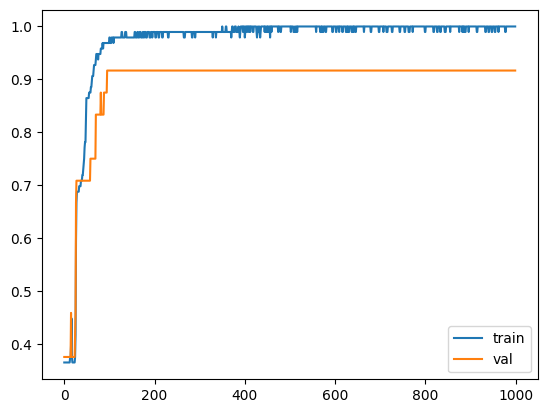

In [133]:
import matplotlib.pyplot as plt
# 정확도 그래프
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.legend()

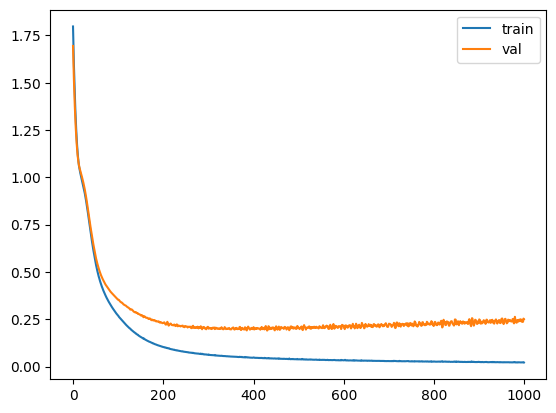

In [134]:
# 오차 그래프
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()

In [136]:
from keras import callbacks
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])


history = model.fit(X_tr, y_tr, epochs = 1000, validation_data=(X_val, y_val), callbacks=early_stopping_callback)

Epoch 1/1000
3/3 [==============================] - 2s 160ms/step - loss: 1.3295 - accuracy: 0.3125 - val_loss: 1.3225 - val_accuracy: 0.2917
Epoch 2/1000
3/3 [==============================] - 0s 37ms/step - loss: 1.2615 - accuracy: 0.3125 - val_loss: 1.2561 - val_accuracy: 0.2917
Epoch 3/1000
3/3 [==============================] - 0s 40ms/step - loss: 1.2013 - accuracy: 0.3542 - val_loss: 1.1983 - val_accuracy: 0.3750
Epoch 4/1000
3/3 [==============================] - 0s 68ms/step - loss: 1.1488 - accuracy: 0.5729 - val_loss: 1.1488 - val_accuracy: 0.6250
Epoch 5/1000
3/3 [==============================] - 0s 94ms/step - loss: 1.1043 - accuracy: 0.6250 - val_loss: 1.1044 - val_accuracy: 0.6250
Epoch 6/1000
3/3 [==============================] - 0s 150ms/step - loss: 1.0671 - accuracy: 0.6354 - val_loss: 1.0640 - val_accuracy: 0.6250
Epoch 7/1000
3/3 [==============================] - 0s 112ms/step - loss: 1.0296 - accuracy: 0.6354 - val_loss: 1.0284 - val_accuracy: 0.6250
Epoch 8/10

In [137]:
from keras.layers import Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])
history = model.fit(X_tr, y_tr, epochs = 1000,
validation_data=(X_val, y_val),
callbacks=early_stopping_callback)


Epoch 1/1000
3/3 [==============================] - 1s 98ms/step - loss: 4.3406 - accuracy: 0.3021 - val_loss: 3.6215 - val_accuracy: 0.3333
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 4.1390 - accuracy: 0.2917 - val_loss: 3.3723 - val_accuracy: 0.3333
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 4.4954 - accuracy: 0.2812 - val_loss: 3.1422 - val_accuracy: 0.3333
Epoch 4/1000
3/3 [==============================] - 0s 20ms/step - loss: 3.3120 - accuracy: 0.3750 - val_loss: 2.9280 - val_accuracy: 0.3333
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 3.8104 - accuracy: 0.2917 - val_loss: 2.7306 - val_accuracy: 0.3333
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.9729 - accuracy: 0.3333 - val_loss: 2.5491 - val_accuracy: 0.3333
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.0105 - accuracy: 0.3229 - val_loss: 2.3900 - val_accuracy: 0.3333
Epoch 8/1000


In [139]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 192ms/step - loss: 0.3577 - accuracy: 0.9667


[0.35768020153045654, 0.9666666388511658]

In [140]:
regularizers.L1L2(l1=0.01, l2=0.01)

In [142]:
from keras.layers import Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu', kernel_regularizer = regularizers.L1L2(l1=0.1, l2=0.1)))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])
history = model.fit(X_tr, y_tr, epochs = 500,
validation_data=(X_val, y_val),
callbacks=early_stopping_callback)


Epoch 1/500
3/3 [==============================] - 1s 102ms/step - loss: 12.7077 - accuracy: 0.3333 - val_loss: 12.5196 - val_accuracy: 0.3750
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 12.3897 - accuracy: 0.3750 - val_loss: 12.2222 - val_accuracy: 0.4167
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 12.1171 - accuracy: 0.5417 - val_loss: 11.9694 - val_accuracy: 0.6250
Epoch 4/500
3/3 [==============================] - 0s 28ms/step - loss: 11.8801 - accuracy: 0.6458 - val_loss: 11.7451 - val_accuracy: 0.7083
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 11.6684 - accuracy: 0.6667 - val_loss: 11.5366 - val_accuracy: 0.7083
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 11.4686 - accuracy: 0.6458 - val_loss: 11.3388 - val_accuracy: 0.7083
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 11.2772 - accuracy: 0.6667 - val_loss: 11.1473 - val_accuracy: 0.7083
Epoch